#Data Augmentation With Feature Extraction

Install opendatasets

In [1]:
!pip install opendatasets

Open the dataset from Kaggle. Requires username and key, see README.md for more details

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: johnnyplays
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset


Delete redundant image folder

In [3]:
import shutil
shutil.rmtree("/content/face-expression-recognition-dataset/images/images")

Establish training and testing set

In [4]:
train_set = "/content/face-expression-recognition-dataset/images/train"
test_set = "/content/face-expression-recognition-dataset/images/validation"

Function to create dataframe

In [5]:
def dataframe(direct):
    image_paths = []
    labels = []
    for label in os.listdir(direct):
        for filename in os.listdir(os.path.join(direct, label)):
            image_paths.append(os.path.join(direct, label, filename))
            labels.append(label)

            # Check if it's an original image (not translated)
            if not filename.endswith("_translated.jpg"):
                # Add translated version if it exists
                translated_filename = f"{filename[:-4]}_translated.jpg"
                translated_path = os.path.join(direct, label, translated_filename)
                if os.path.exists(translated_path):
                    image_paths.append(translated_path)
                    labels.append(label)  # Same label as original

        print(label, "completed")
    return image_paths, labels

Create dataframe for training set

In [6]:
import pandas as pd
import os

In [11]:
train = pd.DataFrame()
train['image'], train['label'] = dataframe(train_set)

disgust completed
sad completed
surprise completed
angry completed
neutral completed
happy completed
fear completed


Create dataframe for testing set

In [12]:
test = pd.DataFrame()
test['image'], test['label'] = dataframe(test_set)

disgust completed
sad completed
surprise completed
angry completed
neutral completed
happy completed
fear completed


Implement the translation function on training set

In [9]:
import numpy as np
import cv2
from tqdm import tqdm  # For progress bar

# Training data is stored in a DataFrame called 'train'
# with columns 'image' and 'label'

# Get the count of samples in each class
label_counts = train['label'].value_counts()

# Find the maximum class size
max_class_size = label_counts.max()

print(f"Maximum class size: {max_class_size}")

Maximum class size: 7164


In [10]:
def translate_image(image, shift_x, shift_y):
    """Translates an image by the given shift values."""
    M = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
    translated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return translated_image

training_dir = "/content/face-expression-recognition-dataset/images/train"  # Your training data path
shift_range = 5  # Maximum translation in pixels (adjust as needed)

for emotion_folder in os.listdir(training_dir):
    emotion_path = os.path.join(training_dir, emotion_folder)
    num_samples = len(os.listdir(emotion_path))  # Current samples in class

    # Calculate how many more samples are needed
    samples_needed = max_class_size - num_samples

    if samples_needed > 0:  # Augment if needed
        print(f"Augmenting {emotion_folder} with {samples_needed} samples")

        # Get a list of images in the current class
        image_files = os.listdir(emotion_path)

        # Augment and save new images
        for _ in range(samples_needed):
            # Randomly select an image to augment
            image_file = np.random.choice(image_files)
            image_path = os.path.join(emotion_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Generate random translation values
            shift_x = np.random.randint(-shift_range, shift_range + 1)
            shift_y = np.random.randint(-shift_range, shift_range + 1)

            # Translate the image
            translated_image = translate_image(image, shift_x, shift_y)

            # Save the augmented image
            new_filename = f"{image_file[:-4]}_translated_{_}.jpg"  # Unique name
            new_image_path = os.path.join(emotion_path, new_filename)
            cv2.imwrite(new_image_path, translated_image)

print("Data augmentation completed.")

Augmenting disgust with 6728 samples
Augmenting sad with 2226 samples
Augmenting surprise with 3959 samples
Augmenting angry with 3171 samples
Augmenting neutral with 2182 samples
Augmenting fear with 3061 samples
Data augmentation completed.


# Data Visualization

Mean, Median, STD Dev, Min, and Max of Augmented Dataset

In [34]:
import pandas as pd
import numpy as np

# Assuming your training data is in a pandas DataFrame called 'train'
# and the image data is in a column called 'image'

# Reshape the image data into a 2D array (number of images, total pixels)
num_images = train_features.shape[0]
image_data_reshaped = train_features.reshape(num_images, -1)

# Create a DataFrame from the reshaped image data
image_df = pd.DataFrame(image_data_reshaped)

# Calculate summary statistics for each pixel (numeric feature)
summary_stats = image_df.agg(['mean', 'median', 'std', 'min', 'max'])

# Transpose the table for better readability
summary_stats = summary_stats.T

# Display the summary statistics
print(summary_stats)

           mean  median        std  min    max
0     83.239032    53.0  87.206702  0.0  255.0
1     83.791876    56.0  85.379062  0.0  255.0
2     84.356006    59.0  83.890618  0.0  255.0
3     85.223060    62.0  82.311910  0.0  255.0
4     86.522454    66.0  80.872024  0.0  255.0
...         ...     ...        ...  ...    ...
2299  88.234845    71.0  81.080370  0.0  255.0
2300  86.182699    65.0  81.922247  0.0  255.0
2301  84.430665    61.0  82.887667  0.0  255.0
2302  82.468433    56.0  83.446487  0.0  255.0
2303  80.570192    51.0  84.081145  0.0  255.0

[2304 rows x 5 columns]


Average of Mean, Median, STD Dev, Min, and Max of Augmented Dataset

In [35]:
# Assuming you have the 'summary_stats' DataFrame from the previous step

# Calculate the average values for each statistic
average_values = summary_stats.mean()

# Display the average values
print(average_values)

mean      125.341373
median    126.515625
std        65.183586
min         0.000000
max       255.000000
dtype: float64


Quantity of Images for Classes in Training Set

In [36]:
# Assuming your training data has a column called 'label' for the emotion labels
label_counts = train['label'].value_counts()

# Display the counts/frequencies
print(label_counts)

label
disgust     7164
sad         7164
surprise    7164
angry       7164
neutral     7164
happy       7164
fear        7164
Name: count, dtype: int64


Quantity of Images for Classes in Testing Set

In [37]:
# Assuming your training data has a column called 'label' for the emotion labels
label_counts = test['label'].value_counts()

# Display the counts/frequencies
print(label_counts)

label
happy       1825
neutral     1216
sad         1139
fear        1018
angry        960
surprise     797
disgust      111
Name: count, dtype: int64


Checking Data for Missing Values

In [38]:
# Check for missing values in the entire DataFrame
missing_values = train.isnull().sum()

# Display the missing value counts for each feature
print(missing_values)

image    0
label    0
dtype: int64


Distribution of Pixel Values Histogram Plot for Augmented Data

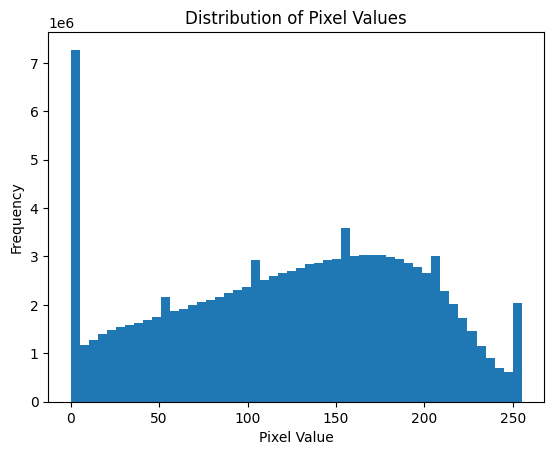

In [39]:
import matplotlib.pyplot as plt

# Assuming 'image_df' is your DataFrame containing the reshaped image data
plt.hist(image_df.values.flatten(), bins=50)  # Flatten the image data
plt.title("Distribution of Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

Pixel Density Correlation Heatmap Plot for Augmented Data

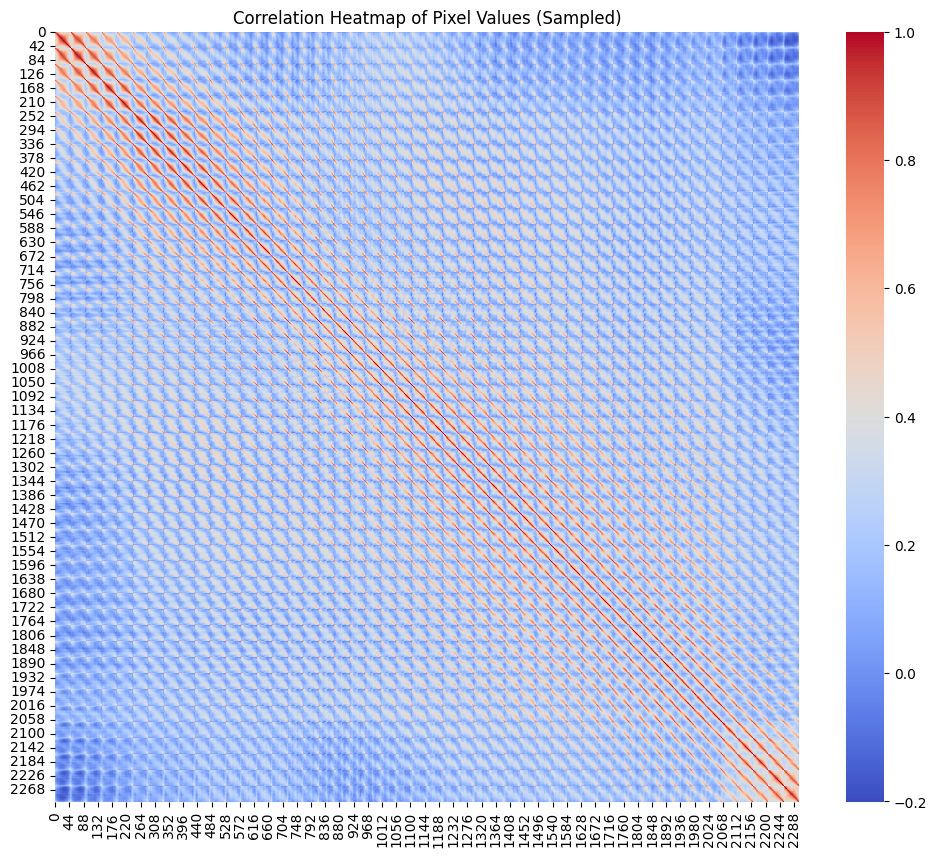

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is called 'image_df'

# Reduce the sample size (e.g., to 1000)
sample_size = 1000  # Adjust this value as needed
random_indices = np.random.choice(image_df.shape[0], size=sample_size, replace=False)
sampled_image_df = image_df.iloc[random_indices]

# Calculate the correlation matrix on the sampled data
correlation_matrix = sampled_image_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")  # Set annot=False to hide values if desired
plt.title("Correlation Heatmap of Pixel Values (Sampled)")
plt.show()